<a href="https://colab.research.google.com/github/agargya123/movie_genre_analysis/blob/main/MKT566.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing relevant libraries

## Cleaning and Processing the Data

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mtv_data  = pd.read_csv("/content/drive/My Drive/TMDB_movie_dataset_v11.csv")

In [4]:
#Latest version (07.07)
mtv_data  = pd.read_csv("/content/drive/My Drive/Latest_TMDB_movie_dataset_v11.csv")

<ipython-input-4-d06037f010c3>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  mtv_data  = pd.read_csv("/content/drive/My Drive/Latest_TMDB_movie_dataset_v11.csv")


In [5]:
mtv_data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,179537,The Kiss in the Tunnel,5.214,14,Released,1899-12-31,0,1,False,NaN,...,The Kiss in the Tunnel,"A train heads for a tunnel. In one car, a rest...",0.771,NaN,NaN,NaN,Bamforth Films,United Kingdom,NaN,NaN
1,262854,La Pelouse - Voitures et foules,5.500,11,Released,1899-12-31,0,1,False,NaN,...,La Pelouse - Voitures et foules,Carriages and crowds cross a grassy area.,0.600,/qVYEBzH8w7jP8DoMXryB2uo4b1q.jpg,NaN,NaN,Lumière,NaN,NaN,NaN
2,268410,Le vieux Paris: Vue prise en bateau,5.600,11,Released,1899-12-31,0,1,False,NaN,...,Le vieux Paris: Vue prise en bateau,"Paris seen from a boat, in this Lumière short ...",0.600,/phY7NfgRE5oc7Wza9rnglAuMES7.jpg,NaN,NaN,Lumière,NaN,NaN,NaN
3,665847,Les mines de charbon de Hon Gay,0.000,0,Released,1899-12-28,0,1,False,NaN,...,Les mines de charbon de Hon Gay,Local workers climb the slope pushing carts.,0.600,/cqdfPQdp8MKoSIlrQ7Q0BYDzuJQ.jpg,NaN,Documentary,Lumière,France,No Language,NaN
4,1307436,Lord Roberts Leaving For South Africa,5.000,1,Released,1899-12-23,0,1,False,NaN,...,Lord Roberts Leaving For South Africa,An actuality and reportage film. This film cap...,0.931,/fv3CKIq7ZD6j0fxUwmpR998DbLs.jpg,NaN,"Documentary, War",Warwick Trading Company,NaN,NaN,"british army, 19th century, boer war, 1890s, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,692199,F1 Review 1994,0.000,0,Released,NaN,0,0,False,NaN,...,F1 Review 1994,The official two-hour review of the 1994 seaso...,0.600,/uDD2XsTEfLaG0Usel4ie3Xw08JT.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1048571,692202,F1 Review 1995,0.000,0,Released,NaN,0,0,False,NaN,...,F1 Review 1995,"Ascari, Fangio, Brabham, Prost and Senna may h...",0.600,/p0Doqr12ZJ0uiIuAkBM6IeyK6AT.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1048572,692206,F1 Review 1996,0.000,0,Released,NaN,0,0,False,NaN,...,F1 Review 1996,From the opening round of the 1996 season in M...,0.600,/sq5yKaB2WuD78y2UyHrCxq7tl3R.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1048573,692209,John Brown's Body at San Quentin Prison,0.000,0,Released,NaN,0,73,False,NaN,...,John Brown's Body at San Quentin Prison,Members of a racially mixed cast of self-confe...,0.600,/AkvkZNXqVeXfaEkVr6hCknbjQYg.jpg,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
type(mtv_data['genres'])

pandas.core.series.Series

In [7]:
mtv_data['genres'].isnull().sum()

399694

In [10]:
# Convert the 'release_date' column to datetime format
mtv_data['release_date'] = pd.to_datetime(mtv_data['release_date'], format='%m/%d/%Y', errors='coerce')
# Extract the year from the 'release_date' column and create a new column 'release_year'
mtv_data['release_year'] = mtv_data['release_date'].dt.year

In [32]:
mtv_data['release_year'].isnull().sum()

145061

In [33]:
mtv_data['release_year'].count()

903514

In [ ]:
#mtv_data[mtv_data['release_year']>2015].sum()

Movies released after 2015 - Used to benchmark #movies we will be dealing with

In [11]:
#does not include 2015, 2016-2024
mtv_data_2015 = mtv_data[mtv_data['release_year']>2015]

In [14]:
mtv_data_2015['release_date'].isnull().sum()

0

In [15]:
mtv_data_2015['genres'].isnull().sum()

102761

In [16]:
movies_selected = mtv_data_2015.dropna(subset=['genres'])

In [17]:
movies_selected

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,release_year
1999,401563,100 Years,0.0,0,Post Production,2099-11-18,0,0,False,/4TyGzPj6OpMXxoy68L0QauOiHVd.jpg,...,"100 Years is an ""upcoming"" science fiction fil...",2.238,/xx6Vps04pGpJ7dZ7UfUy4HpXgPI.jpg,The movie you will never see.,"Drama, Science Fiction","Troublemaker Studios, Kouz Production, Moonwal...",France,English,NaN,2099.0
2000,1259555,La Grève des ouvriers de Margoline,0.0,0,In Production,2074-01-01,0,0,False,NaN,...,NaN,0.600,/h3JH0OtnDjjkIvzjY6IGV7mZazu.jpg,NaN,Documentary,Collectif Cinélutte,France,"Arabic, French","short film, documentary film, manifestation",2074.0
2001,1291666,Pikkuinen...,0.0,0,Released,2061-12-07,0,0,False,NaN,...,NaN,0.000,NaN,NaN,Documentary,NaN,NaN,NaN,NaN,2061.0
2002,1310788,Athens dances Rock 'n' Roll,0.0,0,Released,2057-01-01,0,20,False,NaN,...,The film refers to the fashion of the new Amer...,0.000,/fCS2L46pbdfV7F3MFCfugD6WCpf.jpg,NaN,Documentary,NaN,Greece,Greek,NaN,2057.0
2005,1176134,VERMIN,0.0,0,Planned,2040-10-26,0,100,False,NaN,...,A criminal syndicate recruits a renowned top-t...,0.600,/w9YnzrD8dfCuV2kUs6rVrQ9fF8e.jpg,Crime's Deadliest Secret,Drama,Tombstone Productions,NaN,NaN,NaN,2040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320398,693054,Cold Shivers,0.0,0,Released,2016-01-01,0,19,False,/8seVYSa5ClLIZa7H7HdIKlmUmj9.jpg,...,Kristoffer brings a girl home for the first ti...,5.180,/4Rge7FIgXSo8BsY7a0E0ElOmvdK.jpg,"Bodies, intimacy, love.",Drama,"Mediefabrikken, Nordland kunst og filmfagskole",Norway,Norwegian,"first time, coming of age, short film, teenager",2016.0
320400,693919,Boys,0.0,0,Released,2016-01-01,0,7,False,/npXquYXSaoMEyqQ5cNLBZtzGPfh.jpg,...,What does a bunch of teenagers do in a cemeter...,0.600,/70xEAwnn8SlgNIlIed46TpzA2EN.jpg,NaN,Documentary,Mediefabrikken,"Faeroe Islands, Norway","Faroese, Norwegian",NaN,2016.0
320402,691083,Tindra's Light,0.0,0,Released,2016-01-01,0,10,False,/npSsBbsG7ncM4a2e0AwPuTFt7XM.jpg,...,Tindra is the lighthouse keeper’s daughter. On...,0.600,/hZVxVG5VsxF8rkfir3AGrNAqUyE.jpg,NaN,"Animation, Drama","Mikrofilm, Studio Palegolas",Norway,Norwegian,NaN,2016.0
320403,691063,Geislemacher,0.0,0,Released,2016-01-01,0,0,False,/iNpLIHTk2BEeT4Eub5goCnKWMfB.jpg,...,NaN,0.600,/ovfVlshJXY5GmKiLJnSjwAN8vry.jpg,NaN,"History, Documentary",SchwyzKulturPlus,NaN,German,"tradition, swiss",2016.0


Nearly 215K films released after 2015, without applying any checks or filters.

In [18]:
movies_selected.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
backdrop_path           114752
budget                       0
homepage                170352
imdb_id                  99979
original_language            0
original_title               0
overview                 33375
popularity                   0
poster_path              27744
tagline                 175165
genres                       0
production_companies     99221
production_countries     62041
spoken_languages         54758
keywords                140404
release_year                 0
dtype: int64

Movies released after 2019 -

In [19]:
mtv_data_2020 = mtv_data[mtv_data['release_year']>2019]

In [20]:
mtv_data[mtv_data['release_year']>2019].count()

id                      178769
title                   178768
vote_average            178769
vote_count              178769
status                  178769
release_date            178769
revenue                 178769
runtime                 178769
adult                   178769
backdrop_path            66867
budget                  178769
homepage                 29733
imdb_id                  65838
original_language       178769
original_title          178768
overview                147986
popularity              178769
poster_path             148010
tagline                  28524
genres                  123272
production_companies     86777
production_countries    104908
spoken_languages        112629
keywords                 48307
release_year            178769
dtype: int64

In [22]:
mtv_data_2020['release_date'].isnull().sum()

0

In [21]:
mtv_data_2020['genres'].isnull().sum()

55497

In [23]:
movies_selected_2020 = mtv_data_2020.dropna(subset=['genres'])

In [24]:
movies_selected_2020.isnull().sum()

id                          0
title                       0
vote_average                0
vote_count                  0
status                      0
release_date                0
revenue                     0
runtime                     0
adult                       0
backdrop_path           67935
budget                      0
homepage                97993
imdb_id                 67561
original_language           0
original_title              0
overview                19943
popularity                  0
poster_path             18152
tagline                 98930
genres                      0
production_companies    57382
production_countries    38453
spoken_languages        33748
keywords                83568
release_year                0
dtype: int64

In [ ]:
#movies_selected_2020['genre_tag_count'] = movies_selected_2020['genres'].count

In [ ]:
#type(movies_selected_2020['genres'])

In [ ]:
#print(movies_selected_2020['genres'].apply(len)

In [ ]:
# this is INCORRECT since it counts the letters of the genres and not the number of genres present

genre_counts = movies_selected_2020['genres'].apply(len)
result = pd.concat([movies_selected_2020['genres'], genre_counts], axis=1)

# Rename the 'counts' column to 'genre_count'
result.columns = ['genres', 'genre_count']

# Display the resulting DataFrame
print(result)

                                           genres  genre_count
57             Action, Adventure, Science Fiction           34
282            Science Fiction, Adventure, Action           34
295                                 Action, Crime           13
307     Animation, Family, Comedy, Fantasy, Drama           41
309                    Science Fiction, Adventure           26
...                                           ...          ...
998166                     Comedy, Drama, Romance           22
998187                                Documentary           11
998213                 Adventure, Fantasy, Action           26
998218                                Documentary           11
998220                                     Horror            6

[113328 rows x 2 columns]


In [ ]:
'''Ideas - clustering on the data, #views i.e. #votes ; number of genre tags
Run regression to see which variable affects #votes the most?
Run regression (?) to see the frequency distribution of #votes vs genre_counts
'''

In [25]:
movies_selected_2020.select_dtypes(include=['number']).columns.tolist()

['id',
 'vote_average',
 'vote_count',
 'revenue',
 'runtime',
 'budget',
 'popularity',
 'release_year']

In [26]:
movies_selected_2020

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,release_year
1999,401563,100 Years,0.0,0,Post Production,2099-11-18,0,0,False,/4TyGzPj6OpMXxoy68L0QauOiHVd.jpg,...,"100 Years is an ""upcoming"" science fiction fil...",2.238,/xx6Vps04pGpJ7dZ7UfUy4HpXgPI.jpg,The movie you will never see.,"Drama, Science Fiction","Troublemaker Studios, Kouz Production, Moonwal...",France,English,NaN,2099.0
2000,1259555,La Grève des ouvriers de Margoline,0.0,0,In Production,2074-01-01,0,0,False,NaN,...,NaN,0.600,/h3JH0OtnDjjkIvzjY6IGV7mZazu.jpg,NaN,Documentary,Collectif Cinélutte,France,"Arabic, French","short film, documentary film, manifestation",2074.0
2001,1291666,Pikkuinen...,0.0,0,Released,2061-12-07,0,0,False,NaN,...,NaN,0.000,NaN,NaN,Documentary,NaN,NaN,NaN,NaN,2061.0
2002,1310788,Athens dances Rock 'n' Roll,0.0,0,Released,2057-01-01,0,20,False,NaN,...,The film refers to the fashion of the new Amer...,0.000,/fCS2L46pbdfV7F3MFCfugD6WCpf.jpg,NaN,Documentary,NaN,Greece,Greek,NaN,2057.0
2005,1176134,VERMIN,0.0,0,Planned,2040-10-26,0,100,False,NaN,...,A criminal syndicate recruits a renowned top-t...,0.600,/w9YnzrD8dfCuV2kUs6rVrQ9fF8e.jpg,Crime's Deadliest Secret,Drama,Tombstone Productions,NaN,NaN,NaN,2040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180758,700844,Only Bibi,0.0,0,Released,2020-01-01,0,13,False,/zgVBXQEuoMGvdQ0QCGQZCqXX96U.jpg,...,A concerned citizen encounters a political wri...,0.600,/od054S30kBBzIxY1c6CVNXUeJMs.jpg,Probably.,"Comedy, Romance",NaN,Israel,Hebrew,"bureaucracy, society, romance, love, lonelines...",2020.0
180760,688789,Yves & Variation,0.0,0,Released,2020-01-01,0,15,False,NaN,...,"Every day, concierge Yves Deshommes practices ...",0.600,/oeIwlo4pRrngtPrRoeJB6oSKjnN.jpg,NaN,Documentary,"Jacob Burns Film Center, Valentine & Clark Eme...",United States of America,"English, Haitian; Haitian Creole",NaN,2020.0
180762,688691,Autopioniere im Südwesten,0.0,0,Released,2020-01-01,0,0,False,NaN,...,NaN,0.600,NaN,NaN,Documentary,NaN,NaN,NaN,NaN,2020.0
180763,687015,Julien Clerc - La tournée des 50 ans,0.0,0,Released,2020-01-01,0,0,False,/87yCWOD2oDPQe75wTpBmLSnVrg5.jpg,...,NaN,0.600,/e6dhgzSl46NjGJH8Oms70KqxMWv.jpg,NaN,Music,"Si on chantait, Angora Production",France,French,concert,2020.0


In [27]:
movies_selected_2020.groupby('status').count()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,backdrop_path,budget,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,release_year
status,,,,,,,,,,,,,,,,,,,,,
Canceled,4,4,4,4,4,4,4,4,1,4,...,3,4,4,2,4,3,2,1,0,4
In Production,2599,2599,2599,2599,2599,2599,2599,2599,627,2599,...,2140,2599,1483,525,2599,1465,1816,1868,747,2599
Planned,457,457,457,457,457,457,457,457,180,457,...,363,457,311,108,457,347,360,381,244,457
Post Production,1621,1621,1621,1621,1621,1621,1621,1621,554,1621,...,1333,1621,994,343,1621,1118,1267,1442,665,1621
Released,118584,118584,118584,118584,118584,118584,118584,118584,53973,118584,...,99485,118584,102323,23363,118584,62952,81372,85825,38046,118584
Rumored,7,7,7,7,7,7,7,7,2,7,...,5,7,5,1,7,5,2,7,2,7


Out of 123K, 118K films are marked as "Released".

In [28]:
movies_selected_2020.groupby('release_year').count()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
release_year,,,,,,,,,,,,,,,,,,,,,
2020.0,25500,25500,25500,25500,25500,25500,25500,25500,25500,11834,...,25500,22049,25500,22838,4555,25500,13232,18462,19029,8745
2021.0,28837,28837,28837,28837,28837,28837,28837,28837,28837,13415,...,28837,24582,28837,25707,5352,28837,15440,20458,21182,9054
2022.0,30347,30347,30347,30347,30347,30347,30347,30347,30347,14639,...,30347,25670,30347,26656,6034,30347,16508,20442,21939,9759
2023.0,29651,29651,29651,29651,29651,29651,29651,29651,29651,12637,...,29651,24198,29651,24057,6243,29651,16003,20092,21438,9266
2024.0,8728,8728,8728,8728,8728,8728,8728,8728,8728,2768,...,8728,6661,8728,5756,2101,8728,4550,5225,5788,2798
2025.0,158,158,158,158,158,158,158,158,158,37,...,158,128,158,78,46,158,120,104,115,65
2026.0,24,24,24,24,24,24,24,24,24,4,...,24,22,24,11,4,24,19,18,17,8
2027.0,9,9,9,9,9,9,9,9,9,1,...,9,7,9,5,1,9,6,6,8,2
2028.0,4,4,4,4,4,4,4,4,4,1,...,4,3,4,3,2,4,3,4,1,2


In [34]:
movies_selected_2020_valid = movies_selected_2020[(movies_selected_2020['release_year']<=2024) & (movies_selected_2020['status']=='Released')]

In [35]:
movies_selected_2020_valid

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,release_year
2270,1250792,Untitled Murder Mystery Comedy,0.0,0,Released,2024-12-31,0,0,False,NaN,...,Untitled murder mystery comedy from Not So Pre...,0.000,/brbpFqbw3bFeHS6FUfpx1iQPgZP.jpg,Coming Soon...,"Comedy, Mystery, Crime",Not So Premium Productions,NaN,NaN,NaN,2024.0
2271,1250794,Untitled Young Hawkeye Project,0.0,0,Released,2024-12-31,0,0,False,NaN,...,Untitled Young Hawkeye Project from Not So Pre...,0.000,/eRByLViweVBueh3Tmrg9V8w1nHz.jpg,Coming Soon...,"Action, Adventure, Crime",Not So Premium Productions,NaN,NaN,marvel cinematic universe (mcu),2024.0
2272,1251894,Tornado,0.0,0,Released,2024-12-31,0,13,False,/fjs6mToM8wcCthu2ySJygsXG9Ur.jpg,...,A struggling contractor risks his young sons' ...,0.000,/cf43lKCpKmXcbVUaSX2yhT8mHp.jpg,NaN,Drama,NaN,NaN,English,NaN,2024.0
2282,1270439,Dysfunction,0.0,0,Released,2024-12-31,0,24,False,NaN,...,A man's grasp on reality falls apart when he e...,0.000,/mTwAmaOgzSC4hxI4loD6gpNZbFw.jpg,NaN,Horror,OGMC Productions,NaN,NaN,NaN,2024.0
2291,1129934,"Ch'ul be, Senda Sagrada",0.0,0,Released,2024-12-31,0,0,False,NaN,...,NaN,0.635,/2PtJ4a6zEbQmLsxdEY8XP05EusW.jpg,NaN,Documentary,NaN,Mexico,Spanish,NaN,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180758,700844,Only Bibi,0.0,0,Released,2020-01-01,0,13,False,/zgVBXQEuoMGvdQ0QCGQZCqXX96U.jpg,...,A concerned citizen encounters a political wri...,0.600,/od054S30kBBzIxY1c6CVNXUeJMs.jpg,Probably.,"Comedy, Romance",NaN,Israel,Hebrew,"bureaucracy, society, romance, love, lonelines...",2020.0
180760,688789,Yves & Variation,0.0,0,Released,2020-01-01,0,15,False,NaN,...,"Every day, concierge Yves Deshommes practices ...",0.600,/oeIwlo4pRrngtPrRoeJB6oSKjnN.jpg,NaN,Documentary,"Jacob Burns Film Center, Valentine & Clark Eme...",United States of America,"English, Haitian; Haitian Creole",NaN,2020.0
180762,688691,Autopioniere im Südwesten,0.0,0,Released,2020-01-01,0,0,False,NaN,...,NaN,0.600,NaN,NaN,Documentary,NaN,NaN,NaN,NaN,2020.0
180763,687015,Julien Clerc - La tournée des 50 ans,0.0,0,Released,2020-01-01,0,0,False,/87yCWOD2oDPQe75wTpBmLSnVrg5.jpg,...,NaN,0.600,/e6dhgzSl46NjGJH8Oms70KqxMWv.jpg,NaN,Music,"Si on chantait, Angora Production",France,French,concert,2020.0


In [36]:
genre_count = lambda x : len(x.split(','))

In [37]:
movies_selected_2020_valid['genre_count'] = movies_selected_2020_valid['genres'].apply(genre_count)

movies_selected_2020_valid

<ipython-input-37-abba371a5ba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_selected_2020_valid['genre_count'] = movies_selected_2020_valid['genres'].apply(genre_count)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,release_year,genre_count
2270,1250792,Untitled Murder Mystery Comedy,0.0,0,Released,2024-12-31,0,0,False,NaN,...,0.000,/brbpFqbw3bFeHS6FUfpx1iQPgZP.jpg,Coming Soon...,"Comedy, Mystery, Crime",Not So Premium Productions,NaN,NaN,NaN,2024.0,3
2271,1250794,Untitled Young Hawkeye Project,0.0,0,Released,2024-12-31,0,0,False,NaN,...,0.000,/eRByLViweVBueh3Tmrg9V8w1nHz.jpg,Coming Soon...,"Action, Adventure, Crime",Not So Premium Productions,NaN,NaN,marvel cinematic universe (mcu),2024.0,3
2272,1251894,Tornado,0.0,0,Released,2024-12-31,0,13,False,/fjs6mToM8wcCthu2ySJygsXG9Ur.jpg,...,0.000,/cf43lKCpKmXcbVUaSX2yhT8mHp.jpg,NaN,Drama,NaN,NaN,English,NaN,2024.0,1
2282,1270439,Dysfunction,0.0,0,Released,2024-12-31,0,24,False,NaN,...,0.000,/mTwAmaOgzSC4hxI4loD6gpNZbFw.jpg,NaN,Horror,OGMC Productions,NaN,NaN,NaN,2024.0,1
2291,1129934,"Ch'ul be, Senda Sagrada",0.0,0,Released,2024-12-31,0,0,False,NaN,...,0.635,/2PtJ4a6zEbQmLsxdEY8XP05EusW.jpg,NaN,Documentary,NaN,Mexico,Spanish,NaN,2024.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180758,700844,Only Bibi,0.0,0,Released,2020-01-01,0,13,False,/zgVBXQEuoMGvdQ0QCGQZCqXX96U.jpg,...,0.600,/od054S30kBBzIxY1c6CVNXUeJMs.jpg,Probably.,"Comedy, Romance",NaN,Israel,Hebrew,"bureaucracy, society, romance, love, lonelines...",2020.0,2
180760,688789,Yves & Variation,0.0,0,Released,2020-01-01,0,15,False,NaN,...,0.600,/oeIwlo4pRrngtPrRoeJB6oSKjnN.jpg,NaN,Documentary,"Jacob Burns Film Center, Valentine & Clark Eme...",United States of America,"English, Haitian; Haitian Creole",NaN,2020.0,1
180762,688691,Autopioniere im Südwesten,0.0,0,Released,2020-01-01,0,0,False,NaN,...,0.600,NaN,NaN,Documentary,NaN,NaN,NaN,NaN,2020.0,1
180763,687015,Julien Clerc - La tournée des 50 ans,0.0,0,Released,2020-01-01,0,0,False,/87yCWOD2oDPQe75wTpBmLSnVrg5.jpg,...,0.600,/e6dhgzSl46NjGJH8Oms70KqxMWv.jpg,NaN,Music,"Si on chantait, Angora Production",France,French,concert,2020.0,1


In [47]:
for index, row in movies_selected_2020_valid.iterrows():
    genres = row['genres'].split(',')
    genre_count = movies_selected_2020_valid.at[index, 'genre_count']

    movies_selected_2020_valid.at[index, 'primary_genre'] = genres[0]


    if (genre_count>1):
      movies_selected_2020_valid.at[index, 'secondary_genre'] = genres[1]

    if (genre_count>2):
      movies_selected_2020_valid.at[index, 'tertiary_genre'] = genres[2]



<ipython-input-47-61549b502a51>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_selected_2020_valid.at[index, 'secondary_genre'] = genres[1]
<ipython-input-47-61549b502a51>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_selected_2020_valid.at[index, 'tertiary_genre'] = genres[2]


In [48]:
movies_selected_2020_valid

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genres,production_companies,production_countries,spoken_languages,keywords,release_year,genre_count,primary_genre,secondary_genre,tertiary_genre
2270,1250792,Untitled Murder Mystery Comedy,0.0,0,Released,2024-12-31,0,0,False,NaN,...,"Comedy, Mystery, Crime",Not So Premium Productions,NaN,NaN,NaN,2024.0,3,Comedy,Mystery,Crime
2271,1250794,Untitled Young Hawkeye Project,0.0,0,Released,2024-12-31,0,0,False,NaN,...,"Action, Adventure, Crime",Not So Premium Productions,NaN,NaN,marvel cinematic universe (mcu),2024.0,3,Action,Adventure,Crime
2272,1251894,Tornado,0.0,0,Released,2024-12-31,0,13,False,/fjs6mToM8wcCthu2ySJygsXG9Ur.jpg,...,Drama,NaN,NaN,English,NaN,2024.0,1,Drama,NaN,NaN
2282,1270439,Dysfunction,0.0,0,Released,2024-12-31,0,24,False,NaN,...,Horror,OGMC Productions,NaN,NaN,NaN,2024.0,1,Horror,NaN,NaN
2291,1129934,"Ch'ul be, Senda Sagrada",0.0,0,Released,2024-12-31,0,0,False,NaN,...,Documentary,NaN,Mexico,Spanish,NaN,2024.0,1,Documentary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180758,700844,Only Bibi,0.0,0,Released,2020-01-01,0,13,False,/zgVBXQEuoMGvdQ0QCGQZCqXX96U.jpg,...,"Comedy, Romance",NaN,Israel,Hebrew,"bureaucracy, society, romance, love, lonelines...",2020.0,2,Comedy,Romance,NaN
180760,688789,Yves & Variation,0.0,0,Released,2020-01-01,0,15,False,NaN,...,Documentary,"Jacob Burns Film Center, Valentine & Clark Eme...",United States of America,"English, Haitian; Haitian Creole",NaN,2020.0,1,Documentary,NaN,NaN
180762,688691,Autopioniere im Südwesten,0.0,0,Released,2020-01-01,0,0,False,NaN,...,Documentary,NaN,NaN,NaN,NaN,2020.0,1,Documentary,NaN,NaN
180763,687015,Julien Clerc - La tournée des 50 ans,0.0,0,Released,2020-01-01,0,0,False,/87yCWOD2oDPQe75wTpBmLSnVrg5.jpg,...,Music,"Si on chantait, Angora Production",France,French,concert,2020.0,1,Music,NaN,NaN


In [ ]:
# movies_selected_2020_valid['primary_genre'] = movies_selected_2020_valid['genres'].apply(lambda x: x.split(',')[0])
# movies_selected_2020_valid['sec_genre'] = movies_selected_2020_valid['genres'].apply(lambda x: x.split(',')[1])
# movies_selected_2020_valid['tert_genre'] = movies_selected_2020_valid['genres'].apply(lambda x: x.split(',')[2])

## Preprocessing Result : Features of 'movies_selected_valid_2020':
<ul><li> Movies released after 2019
<li> Only valid release years (i.e. until and including 2024)
<li> Movies with the status "Released"
<li> Movies with a non-null genre column
<li> Contains count of genre tags under 'genre_count'
</ul>

In [49]:
movies_selected_2020_valid.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,release_year,genre_count
count,1.185580e+05,118558.000000,118558.000000,118558,1.185580e+05,118558.000000,1.185580e+05,118558.000000,118558.000000,118558.000000
mean,9.829875e+05,2.157662,14.201673,2022-03-03 18:37:01.616423680,6.516410e+05,45.266587,2.793359e+05,2.177718,2021.664401,1.484337
min,3.247100e+04,0.000000,0.000000,2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000,2020.000000,1.000000
25%,8.381225e+05,0.000000,0.000000,2021-03-01 00:00:00,0.000000e+00,4.000000,0.000000e+00,0.600000,2021.000000,1.000000
50%,9.942420e+05,0.000000,0.000000,2022-03-16 00:00:00,0.000000e+00,20.000000,0.000000e+00,0.600000,2022.000000,1.000000
75%,1.133246e+06,5.300000,1.000000,2023-02-24 00:00:00,0.000000e+00,85.000000,0.000000e+00,1.223000,2023.000000,2.000000
max,1.313397e+06,10.000000,18299.000000,2024-12-31 00:00:00,3.000000e+09,999.000000,8.880000e+08,2994.357000,2024.000000,17.000000
std,1.856662e+05,3.339210,196.345302,NaN,2.245723e+07,51.723905,6.787835e+06,21.398061,1.196914,0.777597


In [ ]:
#Maximum genre counts - 12

In [39]:
movies_selected_2020_valid[movies_selected_2020_valid['genre_count']==12]['genres'].tolist()

['Comedy, Action, Adventure, Crime, Western, Documentary, Fantasy, History, Drama, Mystery, Thriller, Science Fiction']

In [50]:
with pd.ExcelWriter('/content/movies_output_file.xlsx') as writer:
    movies_selected_2020_valid.to_excel(writer, sheet_name='All Movies', index=False, na_rep='NaN')

from google.colab import files
files.download('/content/movies_output_file.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
movies_selected_2020_valid.columns.tolist()


['id',
 'title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'runtime',
 'adult',
 'backdrop_path',
 'budget',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'tagline',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages',
 'release_year',
 'genre_count']

In [51]:
numeric_columns = movies_selected_2020_valid.select_dtypes(include='number')

## Correlation and Regression Analysis

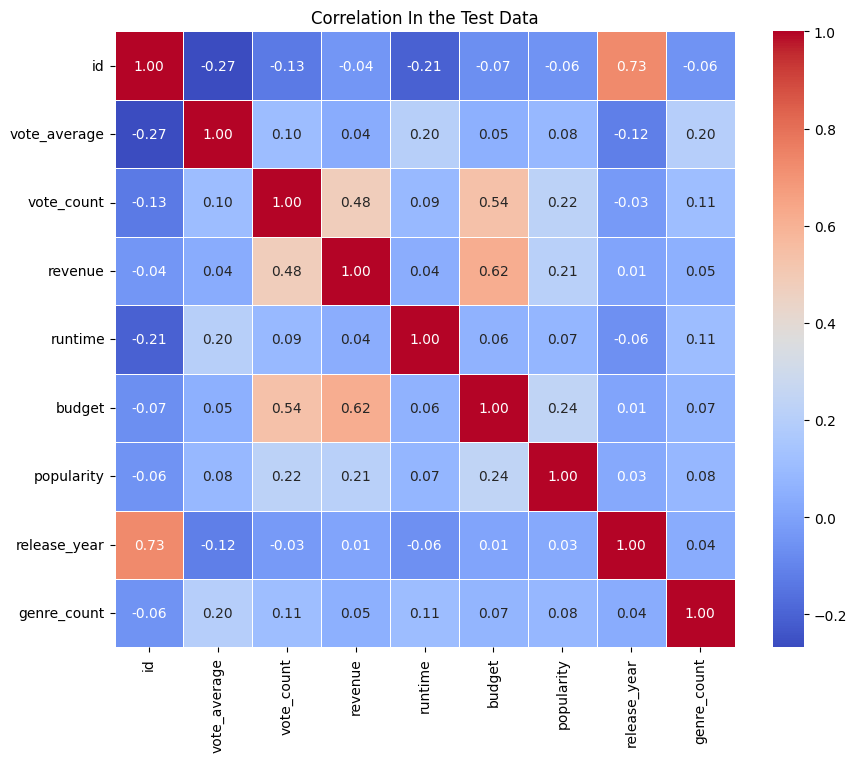

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation In the Test Data')
plt.show()

###Sanity Checks -

In [53]:
movies_selected_2020_valid['budget'].isna().sum()

0

In [54]:
movies_selected_2020_valid['revenue'].isna().sum()

0

In [55]:
movies_selected_2020_valid['budget'].eq(0).sum()

106008

In [56]:
movies_selected_2020_valid['revenue'].eq(0).sum()

116119

In [ ]:
numeric_columns.columns.tolist()

['id',
 'vote_average',
 'vote_count',
 'revenue',
 'runtime',
 'budget',
 'popularity',
 'release_year',
 'genre_count']

In [57]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Assuming 'vote_count' is the column for vote count and 'genre_count' is the column for genre count
X = movies_selected_2020_valid[['revenue','runtime','budget','popularity', 'release_year','genre_count']]
y = movies_selected_2020_valid['vote_count']

scaler = StandardScaler()
# Add a constant to the independent variable (genre count)
X_scaled = scaler.fit_transform(X)

# Add a constant to the independent variable (genre count)
X_scaled = sm.add_constant(X_scaled)

# Fit the regression model
model = sm.OLS(y, X_scaled).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             vote_count   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        04:30:26   Log-Likelihood:            -7.6987e+05
No. Observations:              118558   AIC:                         1.540e+06
Df Residuals:                  118551   BIC:                         1.540e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2017      0.464     30.577      0.0

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is the DataFrame containing the features for which you want to calculate VIF
# X should not contain the target variable

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

        Feature       VIF
0       revenue  1.777056
1       runtime  1.537300
2        budget  1.786719
3    popularity  1.092252
4  release_year  5.006816
5   genre_count  4.769415


In [ ]:
#None of the columns are correlated.

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Assuming 'vote_count' is the column for vote count and 'genre_count' is the column for genre count
X = movies_selected_2020_valid[['genre_count']]
y = movies_selected_2020_valid['vote_count']

#scaler = StandardScaler()
# Add a constant to the independent variable (genre count)
#X_scaled = scaler.fit_transform(X)

# Add a constant to the independent variable (genre count)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             vote_count   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1467.
Date:                Thu, 11 Apr 2024   Prob (F-statistic):          8.45e-319
Time:                        22:45:34   Log-Likelihood:            -7.4127e+05
No. Observations:              110166   AIC:                         1.483e+06
Df Residuals:                  110164   BIC:                         1.483e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -29.5515      1.320    -22.393      

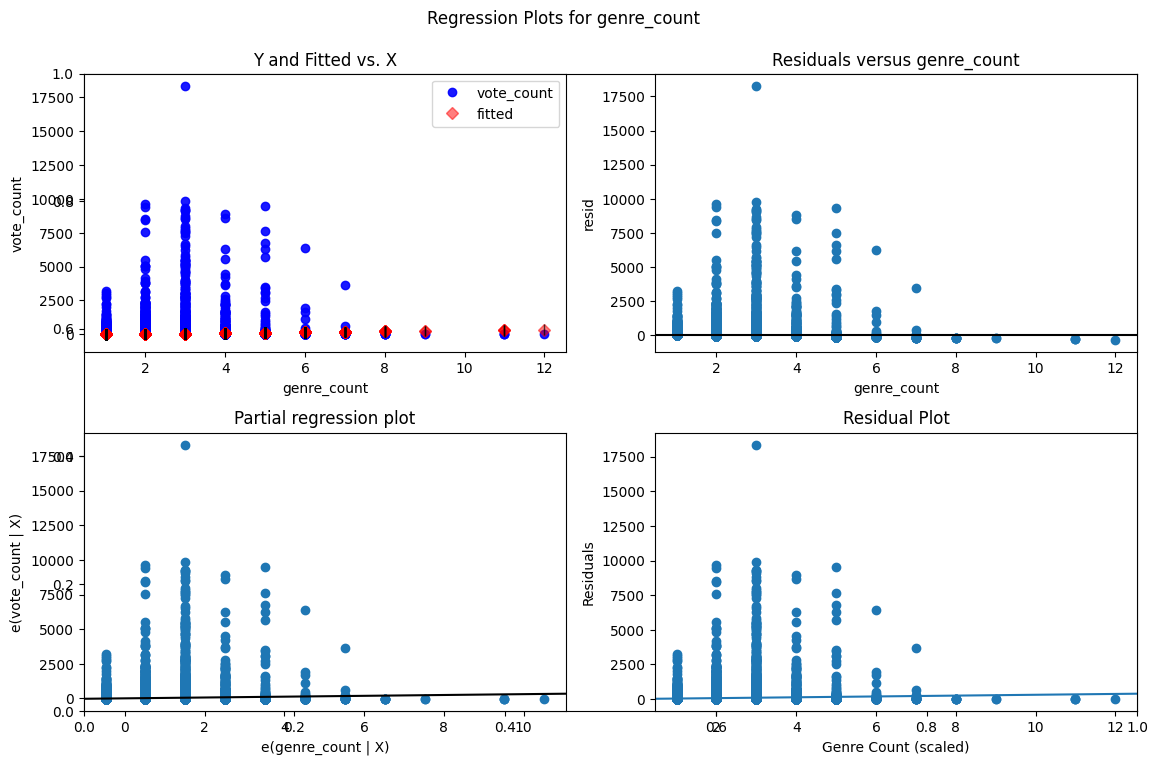

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_regress_exog

# Assuming 'model' is your fitted regression model and 'X_scaled' contains the scaled features
# You may need to adjust these variables based on your specific case

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the residual plot
plot_regress_exog(model, 'genre_count', fig=fig)

# Add titles and labels
plt.title("Residual Plot")
plt.xlabel("Genre Count (scaled)")
plt.ylabel("Residuals")

# Show plot
plt.show()

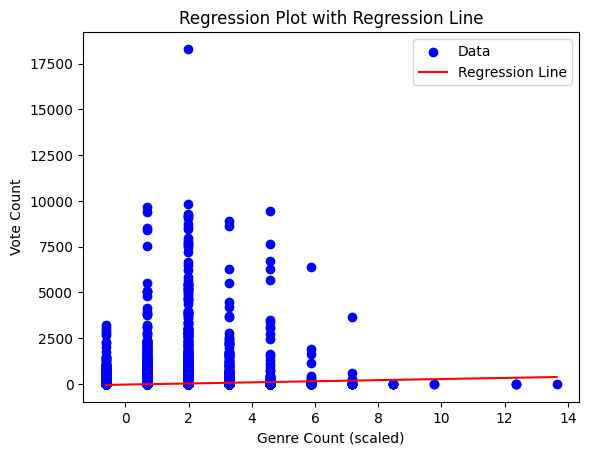

In [ ]:
plt.scatter(X_scaled[:, 1], y, color='blue', label='Data')

# Get the coefficients from the model
intercept = model.params[0]
slope = model.params[1]

# Generate points for the regression line
x_values = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100)
y_values = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Genre Count (scaled)')
plt.ylabel('Vote Count')
plt.title('Regression Plot with Regression Line')
plt.legend()

# Show plot
plt.show()

## Clustering Analysis

In [ ]:
#intial starting dataset
ms2020_clust = movies_selected_2020_valid.copy()  #copies dataset #ms2020_clust

#splitting genres into primary and secondary genres
ms2020_clust['primary_genre'] = ms2020_clust['genres'].apply(lambda x: x.split(',')[0])
ms2020_clust['secondary_genres'] = ms2020_clust['genres'].apply(lambda x: ','.join(sorted(x.split(',')[1:])))

ms2020_clust.head (3)
ms2020_clust.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'release_year', 'genre_count', 'primary_genre', 'secondary_genres'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

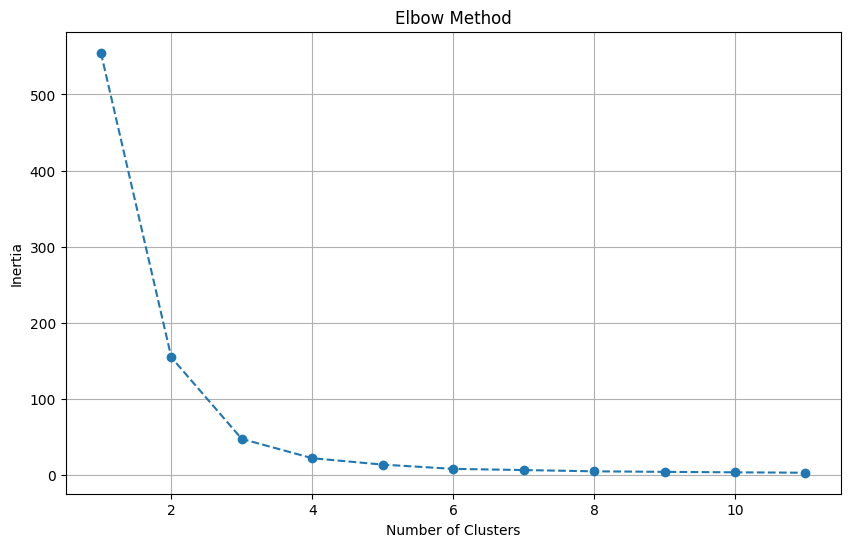

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of clusters
cluster_range = range(1, 12)
cluster_data = ms2020_clust[['genre_count', 'vote_count']]
scaler = MinMaxScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
# Compute KMeans for each number of clusters
inertias = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(cluster_data_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Cluster assignments:
Cluster 0:
                                                 title  genre_count  \
295  Birds of Prey (and the Fantabulous Emancipatio...            2   
309                                               Dune            2   
369                                            Cruella            2   
375                                           365 Days            2   
444                                  Top Gun: Maverick            2   

     vote_count  
295        9654  
309        9420  
369        8507  
375        8429  
444        7546  

Cluster 1:
                            title  genre_count  vote_count
57        Spider-Man: No Way Home            3       18299
282      Avatar: The Way of Water            3        9830
307                          Soul            5        9473
320                   Black Widow            3        9298
328  Zack Snyder's Justice League            3        9202



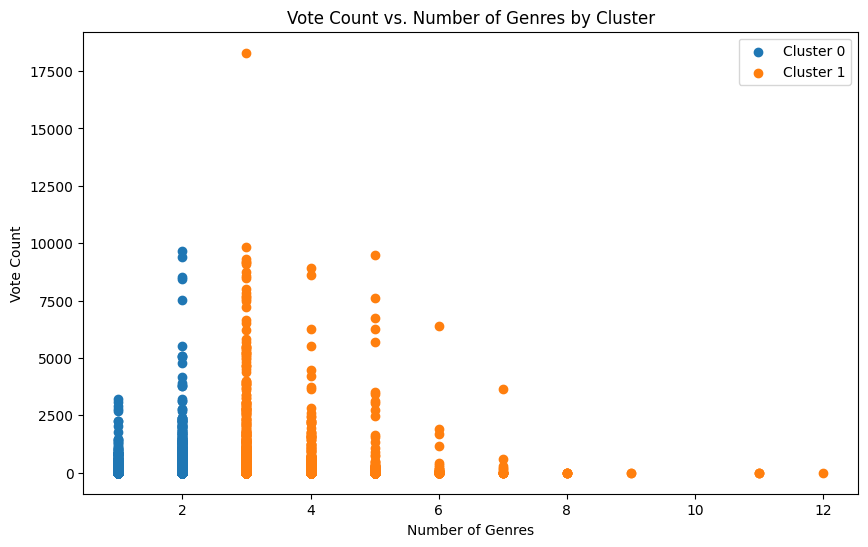

In [ ]:
optimal_k = 2  # Change this value based on your analysis

# Run K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add the cluster labels to the original dataframe
ms2020_clust['cluster'] = cluster_labels

# Analyze the clusters
print("Cluster assignments:")
for cluster in range(optimal_k):
    cluster_movies = ms2020_clust[ms2020_clust['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_movies[['title', 'genre_count', 'vote_count']].head(5))
    print()


plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = ms2020_clust[ms2020_clust['cluster'] == cluster]
    plt.scatter(cluster_data['genre_count'], cluster_data['vote_count'], label=f'Cluster {cluster}')
plt.title('Vote Count vs. Number of Genres by Cluster')
plt.xlabel('Number of Genres')
plt.ylabel('Vote Count')
plt.legend()
plt.show()

We can see that this might not be the best way to cluster our given data, so we looked at silhouette scores too.

In [ ]:

# Find the optimal number of clusters using the silhouette score
silhouette_scores = []
for k in range(2,6):                                 # here 2 to 6 #based on elbow method k = 5/6
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(cluster_data_scaled)
    silhouette_scores.append(silhouette_score(cluster_data_scaled, cluster_labels))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")


Optimal number of clusters: 5


The optimal number of clusters based on this analysis is 5, which may be more suitable.

In [ ]:
optimal_k = 5  # Change this value based on your analysis

# Run K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add the cluster labels to the original dataframe
ms2020_clust['cluster'] = cluster_labels

# Analyze the clusters
print("Cluster assignments:")
for cluster in range(optimal_k):
    cluster_movies = ms2020_clust[ms2020_clust['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_movies[['title', 'genre_count', 'vote_count']].head(5))
    print()


Cluster assignments:
Cluster 0:
                                                  title  genre_count  \
1383                                               Fall            1   
1460  Harry Potter 20th Anniversary: Return to Hogwarts            1   
1540                                          The Whale            1   
1611                                         The Father            1   
1672                                          Nomadland            1   

      vote_count  
1383        3217  
1460        3084  
1540        2917  
1611        2781  
1672        2678  

Cluster 1:
                            title  genre_count  vote_count
57        Spider-Man: No Way Home            3       18299
282      Avatar: The Way of Water            3        9830
320                   Black Widow            3        9298
328  Zack Snyder's Justice League            3        9202
329   Venom: Let There Be Carnage            3        9182

Cluster 2:
                                           

Cluster 0:
Minimum number of genre tags: 1
Maximum number of genre tags: 1
Average number of genre tags: 1.00
Most frequent number of genre tags: 1
Total views: 230642
Average views: 3.19

Cluster 1:
Minimum number of genre tags: 3
Maximum number of genre tags: 3
Average number of genre tags: 3.00
Most frequent number of genre tags: 3
Total views: 711336
Average views: 75.11

Cluster 2:
Minimum number of genre tags: 2
Maximum number of genre tags: 2
Average number of genre tags: 2.00
Most frequent number of genre tags: 2
Total views: 482797
Average views: 18.57

Cluster 3:
Minimum number of genre tags: 4
Maximum number of genre tags: 5
Average number of genre tags: 4.15
Most frequent number of genre tags: 4
Total views: 239852
Average views: 101.80

Cluster 4:
Minimum number of genre tags: 6
Maximum number of genre tags: 12
Average number of genre tags: 6.51
Most frequent number of genre tags: 6
Total views: 18138
Average views: 172.74



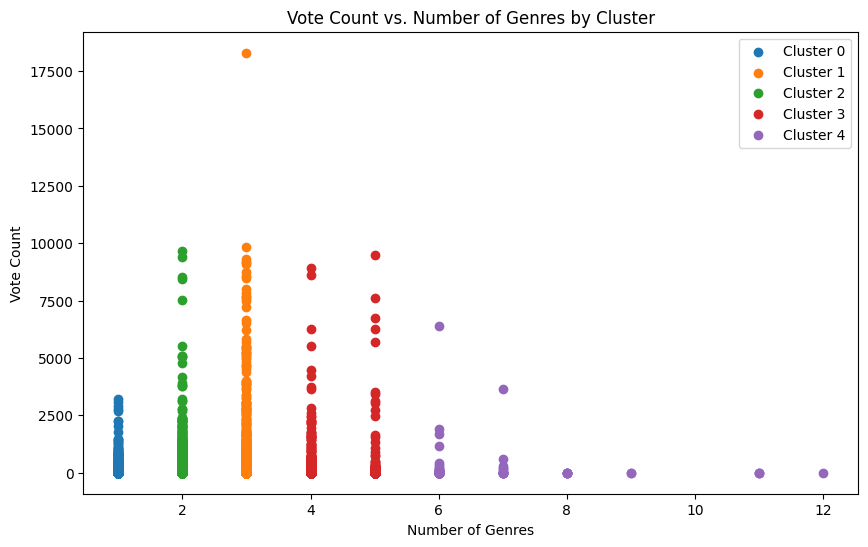

In [ ]:
# Cluster descriptives
for cluster in range(optimal_k):
    cluster_movies = ms2020_clust[ms2020_clust['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(f"Minimum number of genre tags: {cluster_movies['genre_count'].min()}")
    print(f"Maximum number of genre tags: {cluster_movies['genre_count'].max()}")
    print(f"Average number of genre tags: {cluster_movies['genre_count'].mean():.2f}")
    print(f"Most frequent number of genre tags: {cluster_movies['genre_count'].mode()[0]}")
    print(f"Total views: {cluster_movies['vote_count'].sum()}")
    print(f"Average views: {cluster_movies['vote_count'].mean():.2f}")
    print()

# Visualize the relationship between clusters and vote_count
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = ms2020_clust[ms2020_clust['cluster'] == cluster]
    plt.scatter(cluster_data['genre_count'], cluster_data['vote_count'], label=f'Cluster {cluster}')
plt.title('Vote Count vs. Number of Genres by Cluster')
plt.xlabel('Number of Genres')
plt.ylabel('Vote Count')
plt.legend()
plt.show()

Explanation of cluster metrics - <ul>
<li>Minimum/Maximum number of genre tags : helps identify and separate the clusters based on no.of genre tags</li>
<li>Total Views - Total no. of votes received by that genre</li>
<li>Average Views - Average of : (no. of votes received by a film)/ (total no. of views received by films in that cluster)
<br>

#### Explanation of plot
Cluster separation: The plot shows a clear separation between the clusters, indicating that the K-means algorithm has effectively grouped movies based on the combination of the number of genres and vote count.
Cluster characteristics:
<ul><li>Cluster 0 (blue): This cluster contains movies with predominantly 1 genres and relatively low vote counts.
<li>Cluster 1 (orange): This cluster consists of movies with 3 genres and a wide range of vote counts, from low to relatively high.
<li>Cluster 2 (green): This cluster contains movies with 2 genres and generally higher vote counts compared to Clusters 0 and 1.
<li>Cluster 3 (red): This cluster includes movies with 4 to 5  genres and a broad range of vote counts, from moderate to very high.
<li>Cluster 4 (purple): This cluster represents movies with 6 or more genres and relatively low vote counts.<br></li>

Relationship between number of genres and vote count:
For Clusters 0, 1, and 2 (movies with 1 to 3 genre tags, respectively), there seems to be a positive correlation between the number of genres and the vote count, suggesting that movies with more genres in this range tend to have higher views.
However, for Clusters 3 and 4 (movies with 4 or more genres), the trend appears to reverse, with vote counts generally decreasing as the number of genres increases beyond a certain point (around 8 genres). <br>

<b> Overall, 3 seems to be the optimal number of genre tags, that correspond to the highest vote_count of 711K.</b>
